# **Import Pandas and Tabulate:**

In [ ]:
import pandas as pd
from tabulate import tabulate

# **Import Life_Expecancy Table from mySQL:**

In [ ]:
pip install mysql-connector-python

     |████████████████████████████████| 37.6 MB 1.1 MB/s 


In [ ]:
import mysql.connector as sql

In [ ]:
db_connection = sql.connect(host='208.109.18.154', database='ids6db', user='ids6', password='Ksy7448')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT * FROM Life_Expectancy')

In [ ]:
table_rows = db_cursor.fetchall()
Life_Expectancy = pd.DataFrame(table_rows)

In [ ]:
#print new table
print(tabulate(Life_Expectancy, headers='keys', tablefmt='fancy_grid'))
Life_Expectancy.info()

╒═════╤══════════════════════════╤══════╤══════╤═════╤═══════╤══════════════╤══════╤═══════╤══════════════╤════════════╤══════╕
│     │ 0                        │    1 │    2 │   3 │     4 │            5 │    6 │     7 │            8 │          9 │   10 │
╞═════╪══════════════════════════╪══════╪══════╪═════╪═══════╪══════════════╪══════╪═══════╪══════════════╪════════════╪══════╡
│   0 │ Afghanistan              │ 2010 │ 58.8 │ 279 │  0.01 │    79.6794   │ 16.7 │  9.2  │    553.329   │    2883167 │  9.2 │
├─────┼──────────────────────────┼──────┼──────┼─────┼───────┼──────────────┼──────┼───────┼──────────────┼────────────┼──────┤
│   1 │ Afghanistan              │ 2011 │ 59.2 │ 275 │  0.01 │     7.09711  │ 17.2 │  7.87 │     63.5372  │    2978599 │  9.5 │
├─────┼──────────────────────────┼──────┼──────┼─────┼───────┼──────────────┼──────┼───────┼──────────────┼────────────┼──────┤
│   2 │ Afghanistan              │ 2012 │ 59.5 │ 272 │  0.01 │    78.1842   │ 17.6 │  8.52 │    669.959 

# **Name Columns**

In [ ]:
Life_Expectancy.columns = ['Country', 'Year', 'Life_Expectancy', 'Adult_Mortality', 'Alcohol','Percentage_Expenditure',
                           'BMI', 'Total_Expenditure', 'GDP', 'Population', 'Schooling']


# **How does Adult mortality rates affect life expectancy?**

In [ ]:
from scipy.stats import pearsonr #import for correlation
data1 = Life_Expectancy['Adult_Mortality']
data2 = Life_Expectancy['Life_Expectancy']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)


Pearsons correlation: -0.75212


Adult mortality and life expectancy have a negative correlation (-0.75212).
This means that when a country has a high life expectancy, their adult mortality rates will be lower.  It also means the opposite: when a country has low life expectancy, their adult mortality rates will be higher.

# **Does life expectancy have positive or negative correlation with eating habits, drinking alcohol, social factors, and economic factors?**

In [ ]:
Life_Expectancy.corr()

,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
Year,1.000000,0.065634,-0.037776,-0.358063,0.010327,0.048177,0.013623,-0.012964,0.023228,0.071349
Life_Expectancy,0.065634,1.000000,-0.752118,0.399364,0.393558,0.548622,0.237063,0.466719,-0.034120,0.804695
Adult_Mortality,-0.037776,-0.752118,1.000000,-0.217801,-0.250781,-0.412567,-0.138235,-0.299109,0.024284,-0.555038
Alcohol,-0.358063,0.399364,-0.217801,1.000000,0.356947,0.265208,0.237866,0.404765,-0.021096,0.492724
Percentage_Expenditure,0.010327,0.393558,-0.250781,0.356947,1.000000,0.219910,0.277197,0.903099,-0.033152,0.383069
BMI,0.048177,0.548622,-0.412567,0.265208,0.219910,1.000000,0.161114,0.279447,-0.071932,0.552770
Total_Expenditure,0.013623,0.237063,-0.138235,0.237866,0.277197,0.161114,1.000000,0.261385,-0.075150,0.252240
GDP,-0.012964,0.466719,-0.299109,0.404765,0.903099,0.279447,0.261385,1.000000,-0.029179,0.477967
Population,0.023228,-0.034120,0.024284,-0.021096,-0.033152,-0.071932,-0.075150,-0.029179,1.000000,-0.046832
Schooling,0.071349,0.804695,-0.555038,0.492724,0.383069,0.552770,0.252240,0.477967,-0.046832,1.000000


# **Correlations with life expectancy:**

Eating habits(BMI) = .548622 (**Positive** correlation, strength = medium)

Drinking alcohol = .399364 (**Positive** correlation, strength = weak) 

Social factors (Schooling) = .804695 (**Positive** correlation, strength = strong)

Economic Factors
- Percent Expenditure = 0.393558 (**Positive** correlation, strength = weak)
- Total Expenditure = 0.237063 (**Positive** correlation, strength = weak)

# **What is the impact of schooling on the lifespan of humans?**

Life expectancy and Schooling have a strong positive correlation (0.8).  This means that countries with more schooling have higher life expectancy rates.

# **Create and plot several linear regression models for life expectancy (as the dependent variable) and the independent variables that had the highest correlation with life expectancy as found in your correlation analysis.**

# **Provide the equation of each model and compute their R2 and MSE values.**

In [ ]:
#import Linear Regression:
from sklearn.linear_model import LinearRegression
#import numpy
import numpy as np
#import pyplot
import matplotlib.pyplot as plt  # To visualize
#import MSE and R2 score
from sklearn.metrics import mean_squared_error, r2_score

# Schooling vs Life expectancy: 

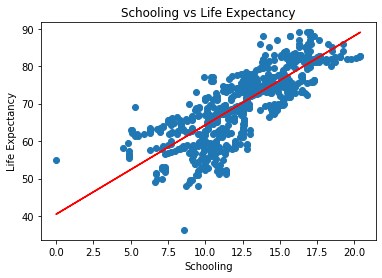

In [ ]:
# Save the first column (all the rows) in X and reshape as an np array 
# Note that we have provided column as 1 but rows as unknown, hence, -1
X = Life_Expectancy[["Schooling"]].values.reshape(-1,1)

# Save the second column (all the rows) in Y
Y = Life_Expectancy [["Life_Expectancy"]].values.reshape(-1,1)

# Create the model
LRmodel = LinearRegression()  

# Perform linear regression
LRmodel.fit(X, Y)   

Y_pred = LRmodel.predict(X)



# Visualize the dataset and the regression line:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color = 'red')
plt.title('Schooling vs Life Expectancy')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.show()

In [ ]:
print("The slope: ", LRmodel.coef_)
print("The intercept: ", LRmodel.intercept_)
print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))

The slope:  [[2.38094363]]
The intercept:  [40.47656528]
MSE:  27.993004745735785
R2:  0.6475344179381866


Equation: y = (2.38094363)x + 40.47656528

# BMI and Life Expectancy:

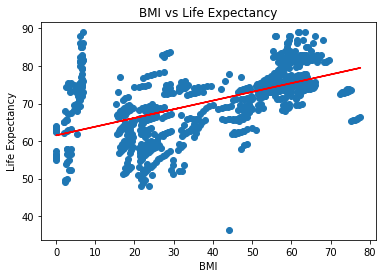

In [ ]:
# Save the first column (all the rows) in X and reshape as an np array 
# Note that we have provided column as 1 but rows as unknown, hence, -1
X = Life_Expectancy[["BMI"]].values.reshape(-1,1)

# Save the second column (all the rows) in Y
Y = Life_Expectancy [["Life_Expectancy"]].values.reshape(-1,1)

# Create the model
LRmodel = LinearRegression()  

# Perform linear regression
LRmodel.fit(X, Y)   

Y_pred = LRmodel.predict(X)



# Visualize the dataset and the regression line:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color = 'red')
plt.title('BMI vs Life Expectancy')
plt.xlabel('BMI')
plt.ylabel('Life Expectancy')
plt.show()

In [ ]:
print("The slope: ", LRmodel.coef_)
print("The intercept: ", LRmodel.intercept_)
print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))

The slope:  [[0.23204324]]
The intercept:  [61.50046276]
MSE:  55.51608097851502
R2:  0.30098580078782666


Equation: y = (0.23204324)x + 61.50046276

# GDP and Life Expectancy:

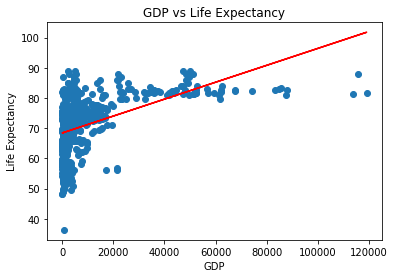

In [ ]:
# Save the first column (all the rows) in X and reshape as an np array 
# Note that we have provided column as 1 but rows as unknown, hence, -1
X = Life_Expectancy[["GDP"]].values.reshape(-1,1)

# Save the second column (all the rows) in Y
Y = Life_Expectancy [["Life_Expectancy"]].values.reshape(-1,1)

# Create the model
LRmodel = LinearRegression()  

# Perform linear regression
LRmodel.fit(X, Y)   

Y_pred = LRmodel.predict(X)



# Visualize the dataset and the regression line:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color = 'red')
plt.title('GDP vs Life Expectancy')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.show()

In [ ]:
print("The slope: ", LRmodel.coef_)
print("The intercept: ", LRmodel.intercept_)
print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))

The slope:  [[0.00027982]]
The intercept:  [68.40681832]
MSE:  62.120658874504485
R2:  0.21782622526076134


Equation: y = (0.00027982)x + 68.4068132

# **Summarize your findings and explain which model performs the best.**

When trying to figure out which factors had the most significant effect on life expectancy I chose to compare schooling, BMI, and GDP because these had the strongest correlation with life expectancy.  The model that performed best is the "Schooling and Life Expectancy" model because, when compared to BMI and GDP, it has the lowest mean square error and the highest R2 (coefficient determination). 